# Clasificación mediante Regresión logística

En este cuaderno vamos a:
+ ver que la curva logística se ajusta *mejor* a los datos que la regresión lineal.
+ y que además proporciona una interpretación probabilistica de la predicción.
---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es

### Preliminares 

En la siguiente celda se realizan los siguientes pasos:
1. carga de módulos genéricos
2. leer los datos y cargarlos en dataframes
2. extracción de características
2. separación en dos conjuntos: *train* y *test*
2. selección de 1 única característica y escalado a $[0,1]$.

Sólo vamos a utilizar *train* y *test* porque el objetivo de este cuaderno es aprender más sobre la regresión lineal. <br>
Para simplificar el código no se realiza ningún tipo de validación.

Vamos a **utilizar una sóla característica** porque queremos visualizar la regresión lineal como técnica de clasificación, y posteriormente extenderlo con la regresión logística. Si utilizaramos más de una característica no podríamos representarlo en un gráfico 2D

In [1]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('../../MyUtils/')
import MyUtils as my
seed = 1234 #<- random generator seed (comment to get randomness)

#-[1]. Load data from CSV and put all in a single dataframe 'FullSet'

FullSet_0 = pd.read_csv('../../Datasets/1000ceros.csv', header=None)
FullSet_1 = pd.read_csv('../../Datasets/1000unos.csv',  header=None)
FullSet = my.join_features_labels(FullSet_0,FullSet_1)

#-[2]. Convert the 'FullSet' of pixels into the set 'X_full' of features and get the set 'Y_full' of labels

theta = 0.5
X_full = my.mnist_features( FullSet.drop('label', axis=1), theta=theta )
Y_full = FullSet[['label']]

#-[3]. Split X_full into TRAIN and TEST 

from sklearn.model_selection import StratifiedShuffleSplit

test_size = 0.2
splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=seed)
split_ix = splitter.split(X_full,Y_full)
for train_ix, test_ix in split_ix:
    X_train = X_full.loc[train_ix].reset_index(drop=True)
    Y_train = Y_full.loc[train_ix].reset_index(drop=True)
    X_test  = X_full.loc[test_ix].reset_index(drop=True)
    Y_test  = Y_full.loc[test_ix].reset_index(drop=True)

#-[4]. Select the features and fit a scaler to [0,1]

from sklearn.preprocessing import MinMaxScaler


feat_selec= ['area']
scaler = MinMaxScaler()

X = scaler.fit_transform(X_train[feat_selec])
Y = Y_train.values.ravel()

#---> X and Y are now numpy arrays ready to train a machine !!

### La regresión logística
Ahora mismo nuestro conjunto de entrenamiento consiste en $\{X,Y\}$
+ $X$ es una columna con los valores del área que ocupa el rectángulo que enmarca cada cifra del dataset
+ $Y$ es la etiqueta (0 ó 1) de cada imagen

Si pintamos $X$ contra $Y$ podemos ver perfectamente:
+ los ejemplos que son de 0 y los que son de 1
+ que hay zonas donde se solapan ejemplos de 0 con ejemplos de 1

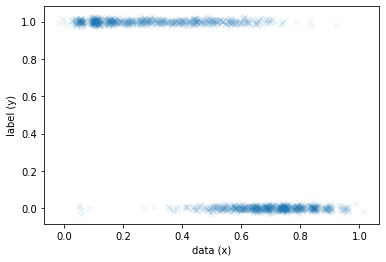

In [2]:
plt.plot(my.jitter(X,sigma=0.01), my.jitter(Y,sigma=0.01),'x',alpha=0.1)
plt.xlabel('data (x)'); plt.ylabel('label (y)')
plt.show()

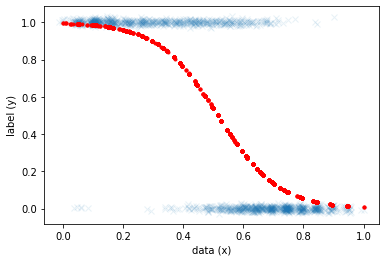

In [3]:
from sklearn.linear_model import LogisticRegression

recta_regresion = LogisticRegression()
recta_regresion.fit(X,Y) 
y_CDF = recta_regresion.predict_proba(X)
y_pred = y_CDF[:,1]  #<-- use 0 instead of 1 to see the logistic curve of the other class


plt.plot(my.jitter(X,sigma=0.01), my.jitter(Y,sigma=0.01),'x',alpha=0.1)
plt.plot(X,y_pred,'.r')
plt.xlabel('data (x)'); plt.ylabel('label (y)')
plt.show()

Igual que cuando ajustabamos una recta, ahora las predicciones de la curva logística, cuando le damos valores entre 0 y 1, son valores continuos. <br>
Pero nosotros necesitamos asignar una etiqueta **¡ discreta !** <br>
$\rightarrow$ **nos falta la función discriminante**
$$
\hat{y} =  
   \begin{cases}
    1 & \text{si } f(x; m,b)  < \theta \\
    0 & \text{otro caso} \\
  \end{cases}
$$
donde $f(x; m,b)$ es la curva logística obtenida con los datos $x$, y cuyos parámetros son $m$ (la pendiente) y $b$ (el corte con el eje vertical)

Por tanto el discriminante depende de $\theta$.

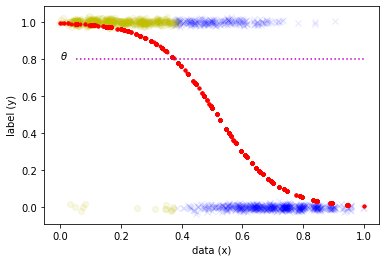

In [4]:
theta = 0.8 #<-- paramter of the discriminant function

ix_1 = y_pred < theta
ix_0 = ~ix_1
plt.plot( my.jitter(X[ix_1],sigma=0.01), \
          my.jitter(Y[ix_1],sigma=0.01), \
          'bx',alpha=0.1)
plt.plot( my.jitter(X[ix_0],sigma=0.01), \
          my.jitter(Y[ix_0],sigma=0.01), \
          'yo',alpha=0.1)
plt.text(0,theta, r'$ \theta $')
plt.plot(X,y_pred,'.r')
plt.plot([0.05,1],[theta,theta],'m:')
plt.xlabel('data (x)'); plt.ylabel('label (y)')
plt.show()